In [1]:
from pycocotools.coco import COCO
from pycocotools import mask as cocomask
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pylab
import random
import json
import os
from PIL import Image
import numpy.ma as npm
from skimage import measure,draw
import cv2

In [2]:
def delete_zero_bfstr(ss):
    for i in range(len(ss)):
        if ss[i]=='0':
            continue
        else:
            ss=ss[i:]
            break
    return ss

In [3]:
def find_id_ann(ann,imgid):
    l=[]
    for anni in ann:
        if str(anni['image_id'])==imgid:
            l.append(anni)
    return l

/Users/sukryool.kang/Projects/Geospatial Project/Code/open-solution-mapping-challenge/image_30cm/tiles/000000071.jpg


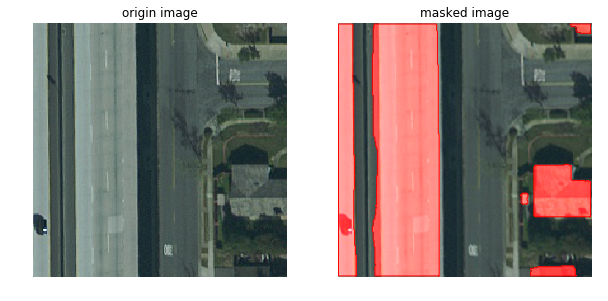


/Users/sukryool.kang/Projects/Geospatial Project/Code/open-solution-mapping-challenge/image_30cm/tiles/000000065.jpg


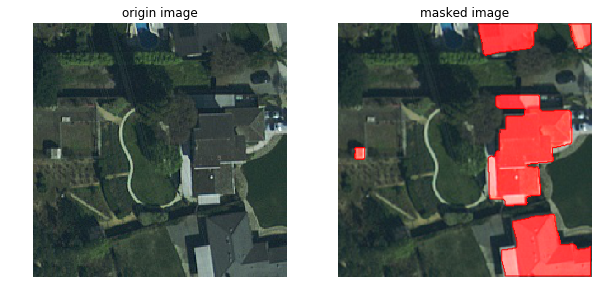


/Users/sukryool.kang/Projects/Geospatial Project/Code/open-solution-mapping-challenge/image_30cm/tiles/000000059.jpg


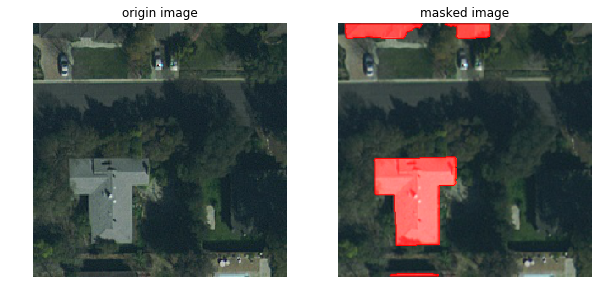


/Users/sukryool.kang/Projects/Geospatial Project/Code/open-solution-mapping-challenge/image_30cm/tiles/000000298.jpg


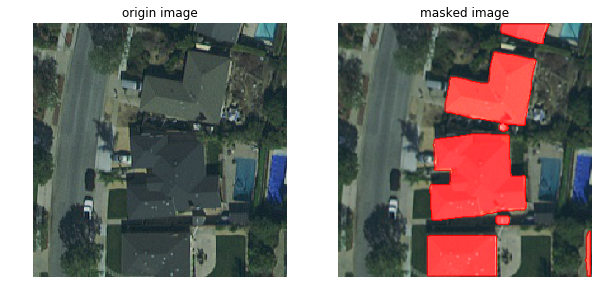


/Users/sukryool.kang/Projects/Geospatial Project/Code/open-solution-mapping-challenge/image_30cm/tiles/000000515.jpg


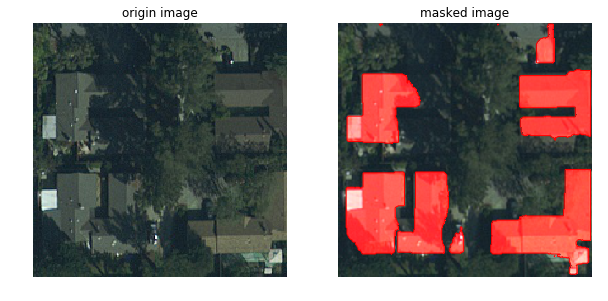


/Users/sukryool.kang/Projects/Geospatial Project/Code/open-solution-mapping-challenge/image_30cm/tiles/000000273.jpg


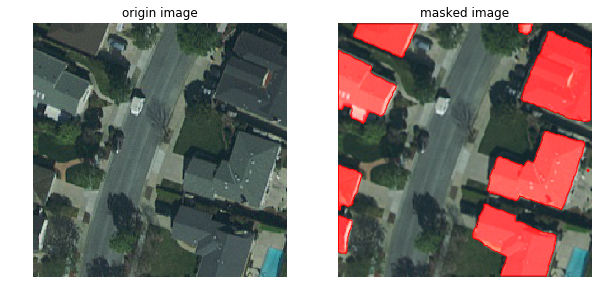


/Users/sukryool.kang/Projects/Geospatial Project/Code/open-solution-mapping-challenge/image_30cm/tiles/000000267.jpg


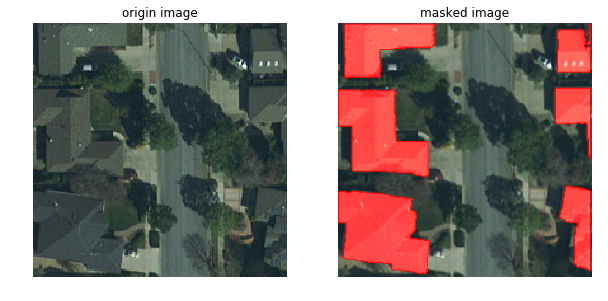


/Users/sukryool.kang/Projects/Geospatial Project/Code/open-solution-mapping-challenge/image_30cm/tiles/000000501.jpg


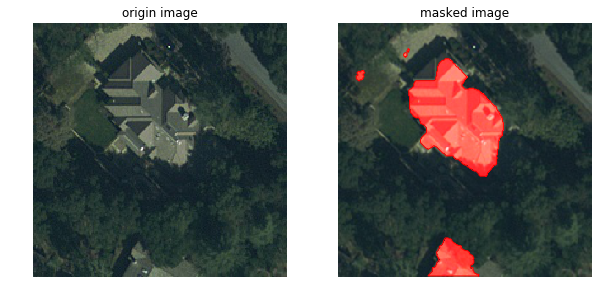


/Users/sukryool.kang/Projects/Geospatial Project/Code/open-solution-mapping-challenge/image_30cm/tiles/000000529.jpg


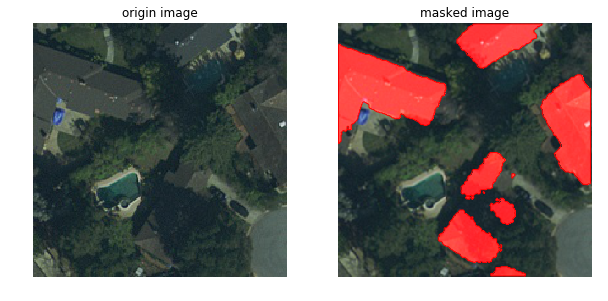


/Users/sukryool.kang/Projects/Geospatial Project/Code/open-solution-mapping-challenge/image_30cm/tiles/000000461.jpg


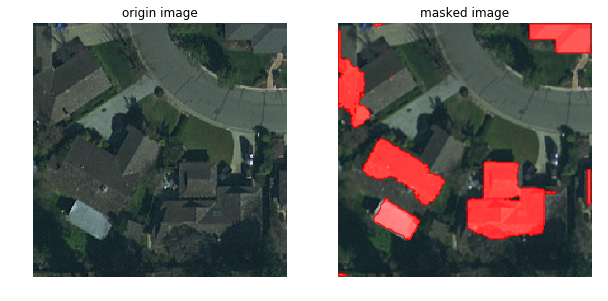


/Users/sukryool.kang/Projects/Geospatial Project/Code/open-solution-mapping-challenge/image_30cm/tiles/000000307.jpg


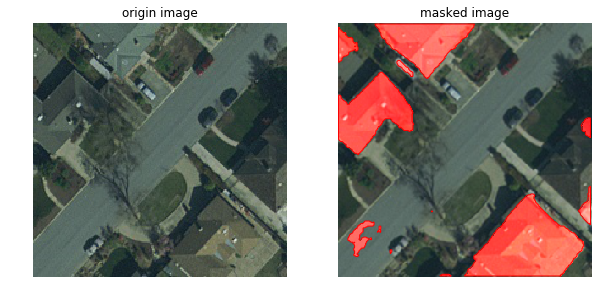


/Users/sukryool.kang/Projects/Geospatial Project/Code/open-solution-mapping-challenge/image_30cm/tiles/000000313.jpg


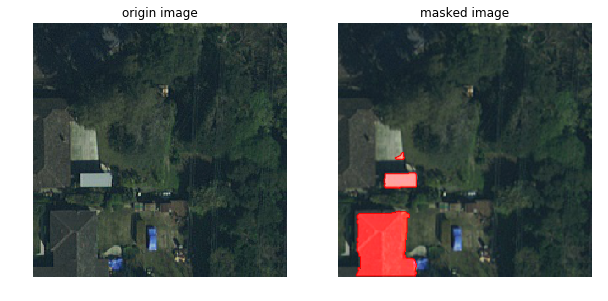


/Users/sukryool.kang/Projects/Geospatial Project/Code/open-solution-mapping-challenge/image_30cm/tiles/000000475.jpg


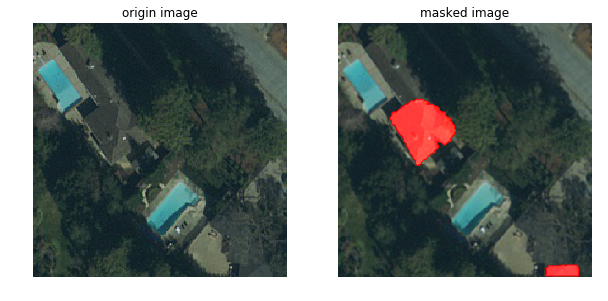


/Users/sukryool.kang/Projects/Geospatial Project/Code/open-solution-mapping-challenge/image_30cm/tiles/000000449.jpg


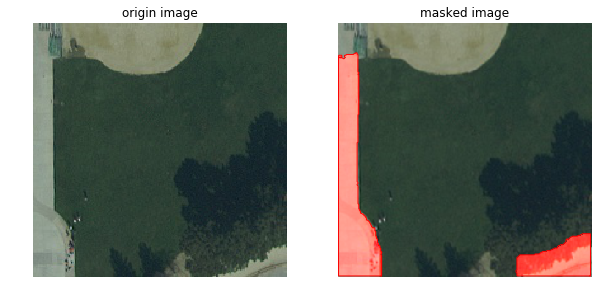


/Users/sukryool.kang/Projects/Geospatial Project/Code/open-solution-mapping-challenge/image_30cm/tiles/000000105.jpg


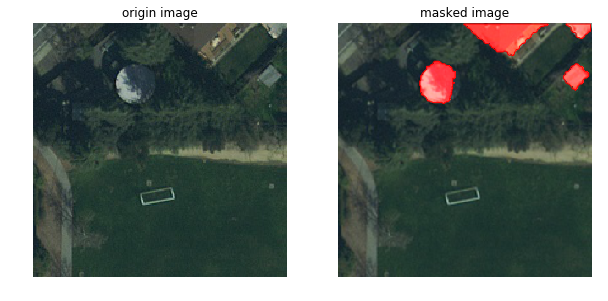


/Users/sukryool.kang/Projects/Geospatial Project/Code/open-solution-mapping-challenge/image_30cm/tiles/000000111.jpg


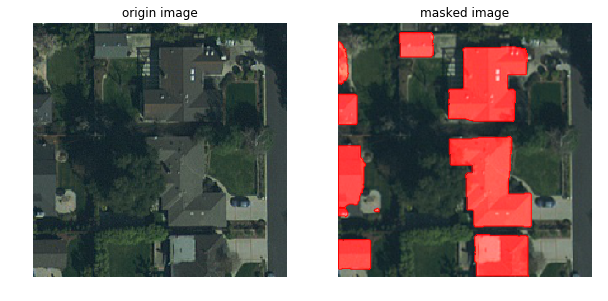


/Users/sukryool.kang/Projects/Geospatial Project/Code/open-solution-mapping-challenge/image_30cm/tiles/000000139.jpg


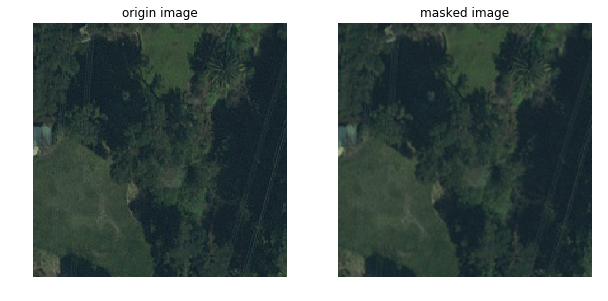


/Users/sukryool.kang/Projects/Geospatial Project/Code/open-solution-mapping-challenge/image_30cm/tiles/000000138.jpg


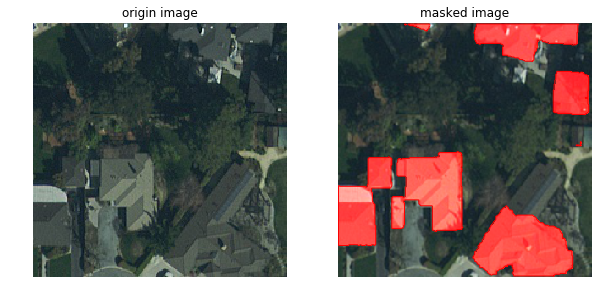

In [ ]:
folder = 'image_30cm'
#folder = 'online_images'

prediction_file = "/Users/sukryool.kang/data/GIS_data/LosAngeles_2017/TILE/train_sample/prediction.json"
image_folder = "/Users/sukryool.kang/data/GIS_data/LosAngeles_2017/TILE/train_sample/images"
with open(prediction_file,'r') as f:
    prediction_json=json.load(f)

#testimages_dir='/Users/sukryool.kang/Projects/Geospatial Project/Code/open-solution-mapping-challenge/'+folder+'/tiles'
testimages_list=os.listdir(image_folder)

for image_id in testimages_list:
    img_filepath=os.path.join(testimages_dir,image_id)
    
    if not img_filepath.endswith('.jpg'):
        continue
        
    print(img_filepath)
    img=mpimg.imread(img_filepath)
    
    # downsample 
    img = cv2.resize(img, (300, 300)) 
    
    img_real=mpimg.imread(img_filepath)
    mask=np.zeros(img.shape)[:,:,0]
    img_id=delete_zero_bfstr(image_id.split('.')[0])
    img_annlist=find_id_ann(prediction_json,img_id)
    for ann in img_annlist:
        m=cocomask.decode(ann['segmentation'])
        
        mask+=m
    mask=mask>0
    contours = measure.find_contours(mask, 0.5)
    img.flags.writeable=True
    img[:,:,0][mask]=255
    plt.figure(figsize=(10, 10))
    plt.subplot(1,2,1)
    plt.title('origin image')
    plt.imshow(img_real)
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title('masked image')
    plt.imshow(img)
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], color='red',linewidth=1)
    plt.axis('off') 
    plt.show()
    
    input()
